In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def stokeslet(xe, x0, eps):
    del_x = xe - x0
    r = np.sqrt(np.sum(del_x**2, axis=1))[:, None, None]
    outer = del_x[:, None, :] * del_x[:, :, None]
    outer.shape
    denom = np.sqrt(r**2 + .1**2) ** 3
    term1 = np.eye(3)[None] * (r**2 + 2 * .1**2) / denom
    term2 = outer / denom
    return term1 + term2

In [3]:
def blob(xe, x0, eps):
    del_x = xe - x0
    r = np.sqrt(np.sum(del_x**2, axis=1))
    return 15 * eps**4 / (8 * np.pi * np.sqrt(r**2 + eps**2)**7)

In [4]:
x0 = np.zeros((1, 3))
l = np.linspace(-1, 1, num=51)
x_mesh, y_mesh = np.meshgrid(l, l)
xe = np.stack((x_mesh.reshape(-1), y_mesh.reshape(-1), np.zeros(x_mesh.size)), axis=-1)
force = np.array([1, 0, 0])

In [5]:
result = stokeslet(xe, x0, 0.1)

In [6]:
u, v, w = np.dot(result, force).T

In [7]:
u.shape

(2601,)

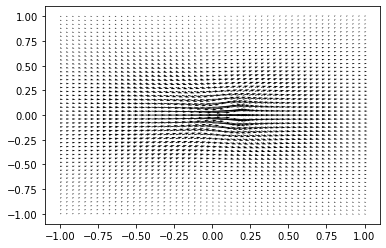

In [8]:
plt.quiver(xe[:, 0], xe[:, 1], u, v)

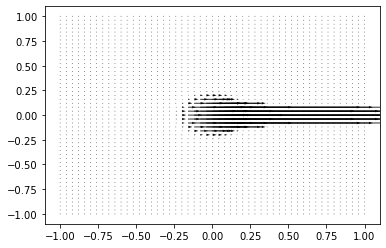

In [9]:
plt.quiver(xe[:, 0], xe[:, 1], blob(xe, x0, 0.1), np.zeros(xe.shape[0]))